# 구매 요인 분석 (Dicision Tree)

- 최적의 트리 만들기 (파라미터 튜닝)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('galaxy.csv')

In [3]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


- startprice => 가격
- carrier => 통신사
- productline => 제품 모델명
- noDescription => 상세설명 있는지 없는지 확인 
- charCountDescription => 상세설명 문자가 몇개 있는지 갯수 
- upperCaseDescription => 상세설명 문장 몇개 있는지 갯수
- sold => 팔렸는지 안팔렸는지 0,1로 구분함 / 팔렸으면 1이고 안팔렸으면 0이다 


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='startprice', ylabel='Density'>

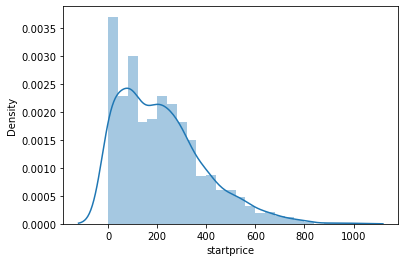

In [6]:
sns.distplot(data['startprice'])

C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charCountDescription', ylabel='Density'>

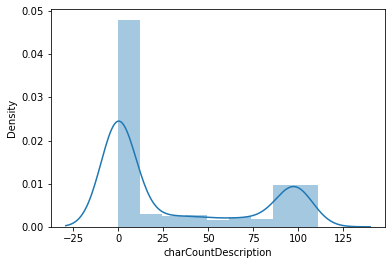

In [7]:
sns.distplot(data['charCountDescription'])

<AxesSubplot:xlabel='productline', ylabel='startprice'>

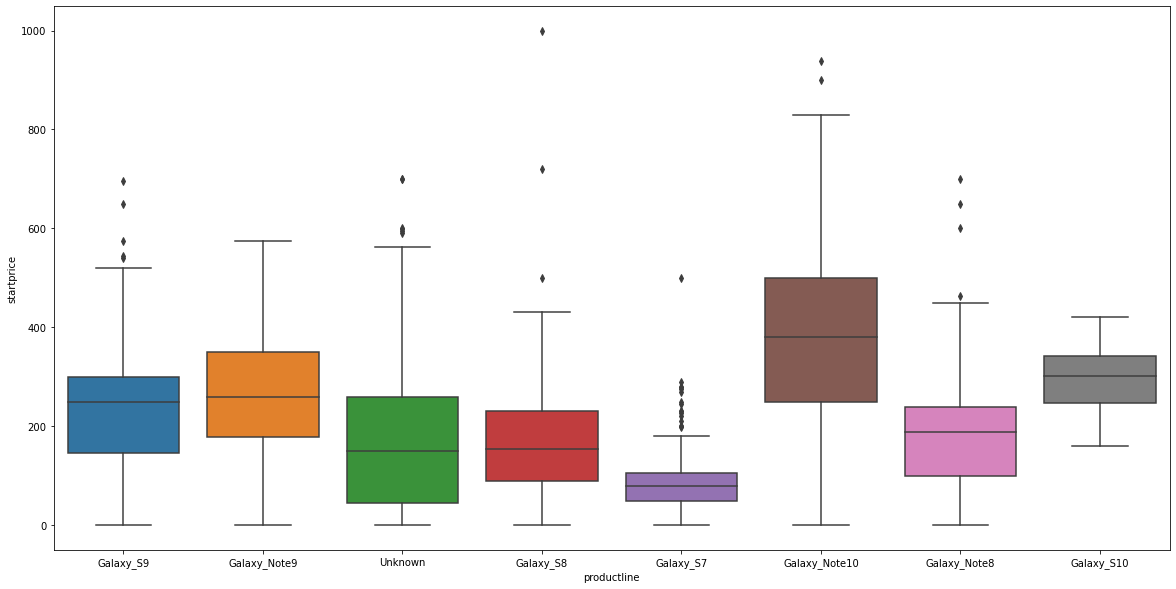

In [9]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='productline', y='startprice', data=data)

In [11]:
data.isna().sum() / len(data) # 널값 계산하기 (missing value 값)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [12]:
data.head() #None 은 데이터가 있는것이고 NaN은 데이터가 없는것이다

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [14]:
data = data.fillna('Unknown') #NaN을 Unknown으로 바꾸기

In [15]:
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


In [16]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [37]:
data[['carrier','color','productline','noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [38]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [39]:
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [40]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [41]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

In [44]:
# 첫번째 방법 
def black(x):
    if x == 'Midnight Black':
        return 'Black'
    elif x == 'Aura Black':
        return 'Black'
    elif x == 'Prism Black':
        return 'Black'
    else:
        return x

In [47]:
# 두번째 방법 (OR 사용하기)
def black(x):
    if (x == 'Midnight Black') | (x == 'Aura Black') | (x == 'Prism Black'):
        return 'Black'
    else:
        return x

In [49]:
data['color'].apply(lambda x: black(x)) #black으로 모두 변경됨

0            White
1          Unknown
2          Unknown
3       Space Gray
4       Space Gray
           ...    
1480       Unknown
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [50]:
# 세번째 방법 (in 사용)
def black(x):
    if x in ['Midnight Black','Aura Black','Prism Black']:
        return 'Black'
    else:
        return x

In [54]:
data['color'] = data['color'].apply(lambda x: black(x))

In [55]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [56]:
data.head(2)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0


In [58]:
data = pd.get_dummies(data, columns=['carrier','color','productline','noDescription'])

- pd.get_dummies 처리 : 결측값을 제외하고 0과 1로 구성된 더미값이 만들어진다. 


In [59]:
data

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,199.99,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,175.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,100.00,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1481,0,239.95,97,5,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1482,0,329.99,93,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = data.drop('sold', axis=1)
y = data['sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model = DecisionTreeClassifier(max_depth = 10)

In [64]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [66]:
pred = model.predict(X_test)

In [67]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
accuracy_score(y_test, pred)

0.7912457912457912

In [73]:
for i in range(2,31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, round(accuracy_score(y_test, pred), 4))

2 0.8182
3 0.8316
4 0.8316
5 0.8249
6 0.8081
7 0.8182
8 0.7879
9 0.8081
10 0.7912
11 0.8013
12 0.7677
13 0.7677
14 0.7879
15 0.771
16 0.7643
17 0.7576
18 0.7441
19 0.734
20 0.7508
21 0.7475
22 0.7407
23 0.7542
24 0.7306
25 0.7677
26 0.7643
27 0.7475
28 0.7508
29 0.7374
30 0.7508


In [74]:
model = DecisionTreeClassifier(max_depth= 3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8316498316498316

In [75]:
confusion_matrix(y_test, pred)

array([[151,  10],
       [ 40,  96]], dtype=int64)

In [76]:
from sklearn.tree import plot_tree

In [79]:
X_train

,BuyItNow,startprice,charCountDescription,upperCaseDescription,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Black,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
1357,1,150.00,80,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
190,1,42.00,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
588,1,199.00,97,7,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
624,0,565.95,14,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1089,0,439.99,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,475.00,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
53,1,160.00,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
350,1,9.99,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
79,1,45.00,25,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [80]:
X_train.columns

Index(['BuyItNow', 'startprice', 'charCountDescription',
       'upperCaseDescription', 'carrier_AT&T', 'carrier_None',
       'carrier_Sprint/T-Mobile', 'carrier_Unknown', 'carrier_Verizon',
       'color_Black', 'color_Gold', 'color_Space Gray', 'color_Unknown',
       'color_White', 'productline_Galaxy_Note10', 'productline_Galaxy_Note8',
       'productline_Galaxy_Note9', 'productline_Galaxy_S10',
       'productline_Galaxy_S7', 'productline_Galaxy_S8',
       'productline_Galaxy_S9', 'productline_Unknown',
       'noDescription_contains description', 'noDescription_no description'],
      dtype='object')

[Text(558.0, 475.65000000000003, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 339.75, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 67.94999999999999, '0.43\n230\n[158, 72]'),
 Text(209.25, 67.94999999999999, '0.42\n10\n[3, 7]'),
 Text(418.5, 203.85000000000002, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 67.94999999999999, '0.319\n367\n[294, 73]'),
 Text(488.25, 67.94999999999999, '0.038\n52\n[51, 1]'),
 Text(837.0, 339.75, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 203.85000000000002, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 67.94999999999999, '0.108\n210\n[12, 198]'),
 Text(767.25, 67.94999999999999, '0.362\n122\n[29, 93]'),
 Text(976.5, 203.85000000000002, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(906.75, 67.94999999999999, '0.495\n125\n[69, 56]'),
 Text(1046.25, 67.9499999999

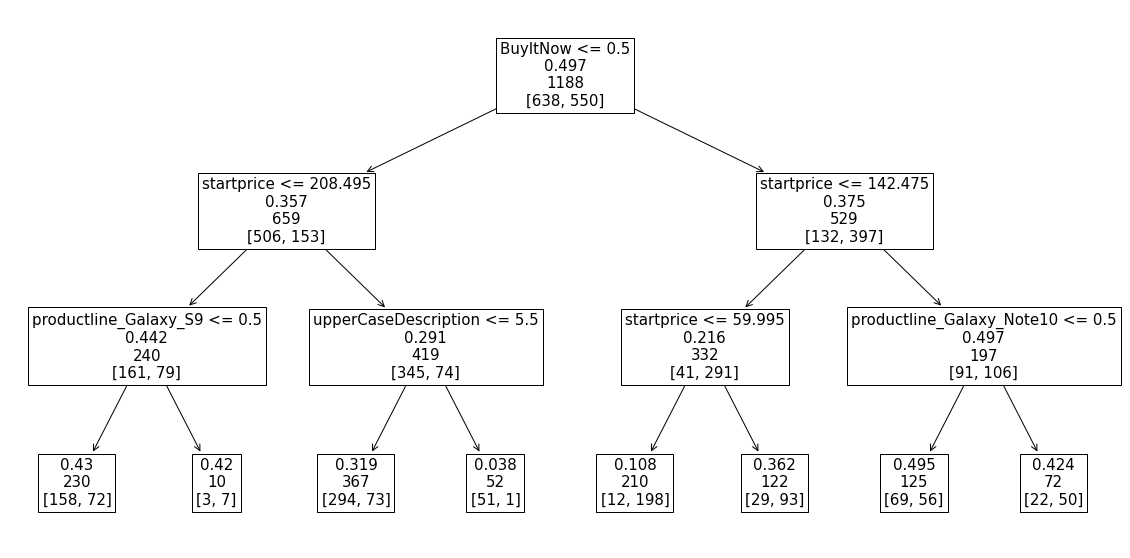

In [86]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label = "None", max_depth=3)

- max_depth으로 트리 차수 변경가능